In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mat
import xlrd as xl
import pylab as py
import matplotlib as mat
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import rcParams
plt.style.use('seaborn-whitegrid')
import cv2 
from PIL import Image
from scipy.interpolate import BSpline, make_interp_spline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures  

In [58]:
s = pd.read_csv('C:/Users/karman4/DATA_BASES/N data/frampships.csv', sep=',')
fs = np.array(s)
f = pd.DataFrame(fs)
f

,0,1,2,3,4,5,6,7,8,9
0,0.363488,0.38,0.182272,0.50,0.350286,0.25,0.377046,0.20,0.376594,0.20
1,0.373514,1.05,0.341705,0.90,0.376594,0.50,0.463610,0.40,0.464536,0.40
2,0.443240,1.10,0.372376,1.10,0.435587,0.90,0.480565,0.80,0.482358,0.80
3,0.468611,0.75,0.427107,0.72,0.463742,1.10,0.522411,0.75,0.493246,0.78
4,0.468953,0.35,0.460568,0.40,0.472795,0.95,0.526144,0.60,0.514862,0.50
...,...,...,...,...,...,...,...,...,...,...
63,1.571101,1.06,1.277353,0.21,NaN,NaN,NaN,NaN,NaN,NaN
64,1.637887,1.08,1.294677,0.65,NaN,NaN,NaN,NaN,NaN,NaN
65,1.754156,0.65,1.302427,1.29,NaN,NaN,NaN,NaN,NaN,NaN
66,1.872351,0.46,1.315098,1.07,NaN,NaN,NaN,NaN,NaN,NaN


Text(0, 0.5, 'A [cm]')

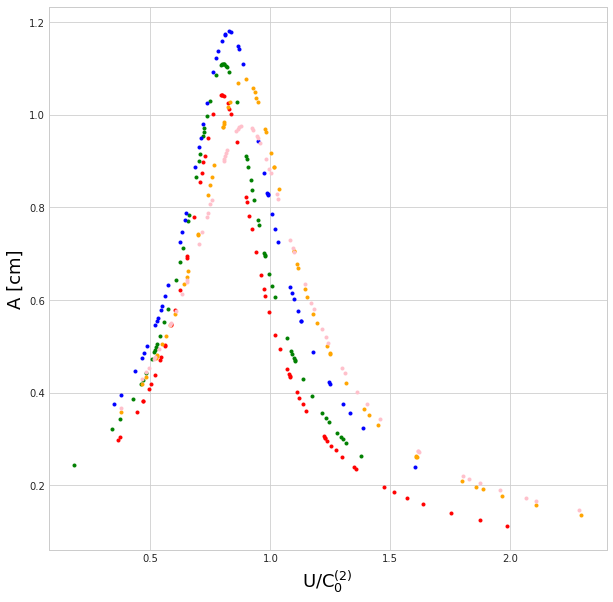

In [14]:
plt.figure(figsize = (10,10))
#use a rational equation to fit resanance curves 
a1 = 1.043 
a2 = 1.11
a3 = 1.18
a4 = 1.08
a5 = 0.98

b1 = 0.13
b2 = 0.14
b3 = 0.16
b4 = 0.18
b5 = 0.21

c1 = 0.798
c2 = 0.803
c3 = 0.827
c4 = 0.89
c5 = 0.895

f['A1'] = (a1*b1)/(np.sqrt(np.power((f[0]-c1),2)+np.power(b1,2)))
f['A2'] = (a2*b2)/(np.sqrt(np.power((f[2]-c2),2)+np.power(b2,2)))
f['A3'] = (a3*b3)/(np.sqrt(np.power((f[4]-c3),2)+np.power(b3,2)))
f['A4'] = (a4*b4)/(np.sqrt(np.power((f[6]-c4),2)+np.power(b4,2)))
f['A5'] = (a5*b5)/(np.sqrt(np.power((f[8]-c5),2)+np.power(b5,2)))
rcParams['font.sans-serif'] = ['Century']
plt.plot(f[0],f['A1'],'.',color='red')
plt.plot(f[2],f['A2'],'.',color='green')
plt.plot(f[4],f['A3'],'.',color='blue')
plt.plot(f[6],f['A4'],'.',color='orange')
plt.plot(f[8],f['A5'],'.',color='pink')

plt.xlabel('U/C$^{(2)}_{0}$',fontname='Century',fontsize=18, color='black')
plt.ylabel('A [cm]',fontname='Century', fontsize=18, color='black')

Text(0, 0.5, 'A" [cm]')

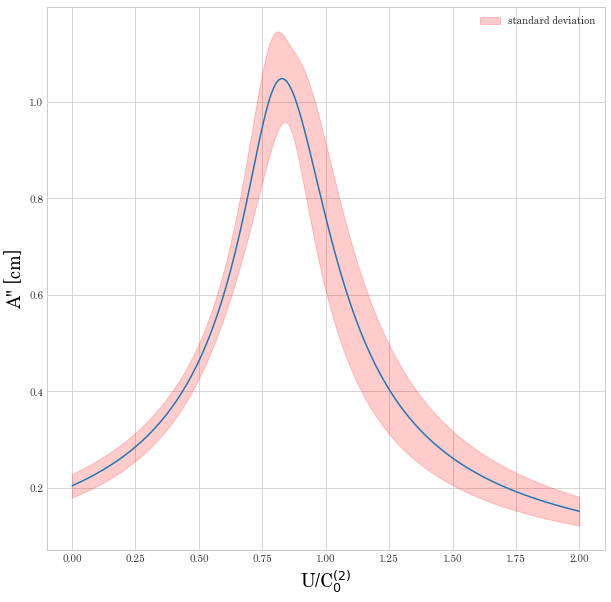

In [13]:
re = np.vstack([y1,y2,y3,y4,y5])
#re = pd.DataFrame(re.T, columns = ['x','y1','y2','y3','y4','y5'])
re = pd.DataFrame(re)
mean = re.mean()
stdv = re.std()
re = np.vstack([x, mean])
mean = pd.DataFrame(re).T
re = np.vstack([x, stdv])
stdv = pd.DataFrame(re).T

plt.figure(figsize=(10,10))
plt.plot(mean[0], mean[1])

#plt.plot(f[0], f[1], '.', color = 'red')
#plt.plot(f[2], f[3], '.', color = 'green')
#plt.plot(f[4], f[5], '.', color = 'blue')
#plt.plot(f[6], f[7], '.', color = 'orange')
#plt.plot(f[8], f[9], '.', color = 'pink')

plt.fill_between(mean[0], mean[1] - stdv[1], mean[1] + stdv[1], label='standard deviation', color='red', alpha=0.2)

plt.legend()
plt.xlabel('U/C$^{(2)}_{0}$',fontname='Century',fontsize=18, color='black')
plt.ylabel('A" [cm]',fontname='Century', fontsize=18, color='black')

In [49]:
ex = pd.ExcelFile('fr_amp2.xlsx')
ex.sheet_names
ss = ex.parse('Sheet1', skiprows = 1)
ss

,fr1,A1,fr2,A2,fr3,A3,fr4,A4,fr5,A5
0,0.587655,0.38,0.182272,0.50,0.485446,0.25,0.601034,0.20,0.606976,0.20
1,0.713738,1.05,0.707023,0.90,0.562019,0.50,0.698571,0.40,0.716173,0.40
2,0.821594,1.10,0.806793,1.10,0.687024,0.90,0.804069,0.80,0.807208,0.80
3,0.959463,0.75,0.924516,0.72,0.783104,1.10,0.926832,0.75,0.878063,0.78
4,1.080064,0.35,1.102402,0.40,0.864834,0.95,1.014504,0.60,1.033339,0.50
...,...,...,...,...,...,...,...,...,...,...
142,NaN,NaN,1.074272,0.40,NaN,NaN,NaN,NaN,NaN,NaN
143,NaN,NaN,1.128521,0.20,NaN,NaN,NaN,NaN,NaN,NaN
144,NaN,NaN,1.233307,0.15,NaN,NaN,NaN,NaN,NaN,NaN
145,NaN,NaN,1.280275,0.10,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
ss

,fr1,A1,fr2,A2,fr3,A3,fr4,A4,fr5,A5
0,0.587655,0.298958,0.182272,0.244217,0.485446,0.375461,0.601034,0.357603,0.606976,0.367943
1,0.713738,0.305420,0.707023,0.322359,0.562019,0.394995,0.698571,0.420028,0.716173,0.429684
2,0.821594,0.358866,0.806793,0.343190,0.687024,0.446492,0.804069,0.434651,0.807208,0.444488
3,0.959463,0.382898,0.924516,0.387417,0.783104,0.475646,0.926832,0.474964,0.878063,0.453976
4,1.080064,0.383243,1.102402,0.420062,0.864834,0.485764,1.014504,0.478883,1.033339,0.473881
...,...,...,...,...,...,...,...,...,...,...
142,NaN,NaN,1.074272,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,NaN,NaN,1.128521,NaN,NaN,NaN,NaN,NaN,NaN,NaN
144,NaN,NaN,1.233307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,NaN,NaN,1.280275,NaN,NaN,NaN,NaN,NaN,NaN,NaN


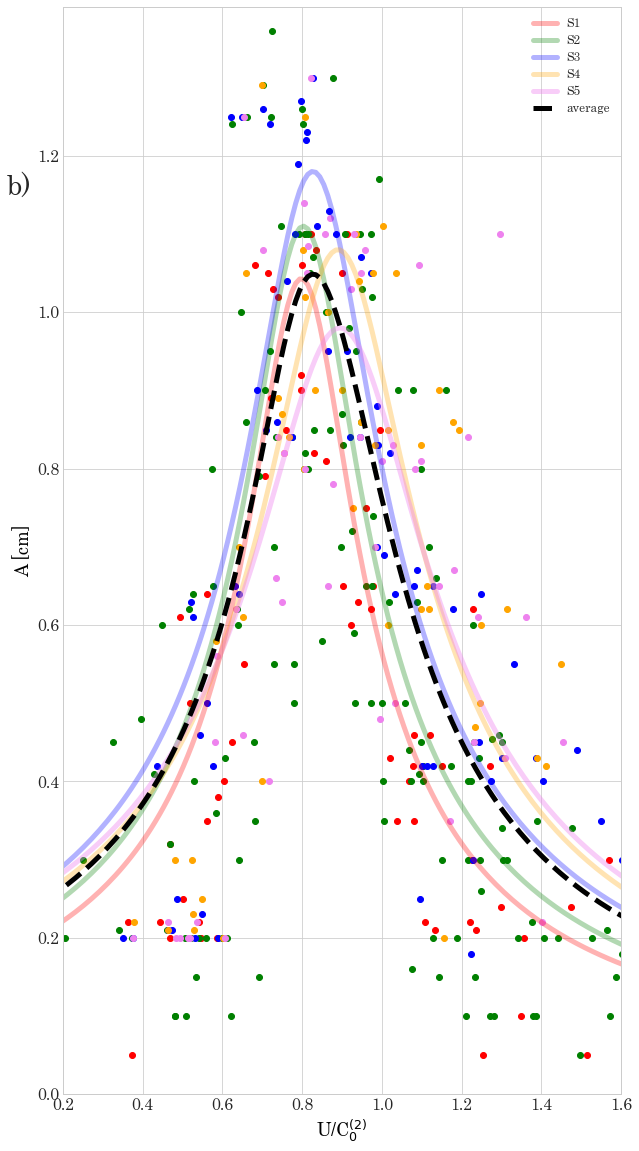

In [51]:
plt.figure(figsize = (10,20))
#use a rational equation to fit resanance curves 
a1 = 1.043 
a2 = 1.11
a3 = 1.18
a4 = 1.08
a5 = 0.98

b1 = 0.13
b2 = 0.14
b3 = 0.16
b4 = 0.18
b5 = 0.21

c1 = 0.798
c2 = 0.803
c3 = 0.827
c4 = 0.89
c5 = 0.895
x = np.linspace(0, 2, 200)
y1 = (a1*b1)/(np.sqrt(np.power((x-c1),2)+np.power(b1,2)))
y2 = (a2*b2)/(np.sqrt(np.power((x-c2),2)+np.power(b2,2)))
y3 = (a3*b3)/(np.sqrt(np.power((x-c3),2)+np.power(b3,2)))
y4 = (a4*b4)/(np.sqrt(np.power((x-c4),2)+np.power(b4,2)))
y5 = (a5*b5)/(np.sqrt(np.power((x-c5),2)+np.power(b5,2)))

ss['A11'] = (a1*b1)/(np.sqrt(np.power((ss['fr1']-c1),2)+np.power(b1,2)))
ss['A22'] = (a2*b2)/(np.sqrt(np.power((ss['fr2']-c2),2)+np.power(b2,2)))
ss['A33'] = (a3*b3)/(np.sqrt(np.power((ss['fr3']-c3),2)+np.power(b3,2)))
ss['A44'] = (a4*b4)/(np.sqrt(np.power((ss['fr4']-c4),2)+np.power(b4,2)))
ss['A55'] = (a5*b5)/(np.sqrt(np.power((ss['fr5']-c5),2)+np.power(b5,2)))

#-----------------------
plt.plot(ss['fr1'], ss['A1'], 'o', color='red')
plt.plot(ss['fr2'], ss['A2'], 'o', color='green')
plt.plot(ss['fr3'], ss['A3'], 'o', color='blue')
plt.plot(ss['fr4'], ss['A4'], 'o', color='orange')
plt.plot(ss['fr5'], ss['A5'], 'o', color='violet')


#-----------------------

rcParams['font.sans-serif'] = ['Century']
plt.plot(x,y1, label='S1', color='red', linewidth=5, alpha=0.3)
plt.plot(x,y2, label='S2', color='green', linewidth=5, alpha=0.3)
plt.plot(x,y3, label='S3', color='blue', linewidth=5, alpha=0.3)
plt.plot(x,y4, label='S4', color='orange', linewidth=5, alpha=0.3)
plt.plot(x,y5, label='S5', color='violet', linewidth=5, alpha=0.4)
plt.plot(mean[0], mean[1], label='average', color='black', linestyle='dashed', linewidth=5)
plt.legend()
plt.xlim(0.2, 1.6)
plt.ylim(0.0, 1.39)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('U/C$^{(2)}_{0}$',fontname='Century',fontsize=18, color='black')
plt.ylabel('A [cm]',fontname='Century', fontsize=18, color='black')
plt.text(0.06, 1.15, 'b)', fontsize=28)
plt.legend(fontsize=12, loc='upper right')

In [53]:
re1 = np.vstack([ss['A11'],ss['A1']])
re1 = pd.DataFrame(re1).T 
re2 = np.vstack([ss['A22'],ss['A2']])
re2 = pd.DataFrame(re2).T 
re3 = np.vstack([ss['A33'],ss['A3']])
re3 = pd.DataFrame(re3).T 
re4 = np.vstack([ss['A44'],ss['A4']])
re4 = pd.DataFrame(re4).T 
re5 = np.vstack([ss['A55'],ss['A5']])
re5 = pd.DataFrame(re5).T 
#rt = pd.DataFrame(rt) 
rt = np.concatenate((re1, re2, re3, re4, re5))
rt = pd.DataFrame(rt).dropna()
rt

,0,1
0,0.548337,0.38
1,0.875229,1.05
2,1.026235,1.10
3,0.654100,0.75
4,0.436570,0.35
...,...,...
644,0.721264,1.08
645,0.924848,1.30
646,0.939271,1.08
647,0.712441,1.06


<ipython-input-54-5865a0e1e868>:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(rt[0][:, np.newaxis], rt[1])   #all observed amplitudes


[0.96491414 0.        ]


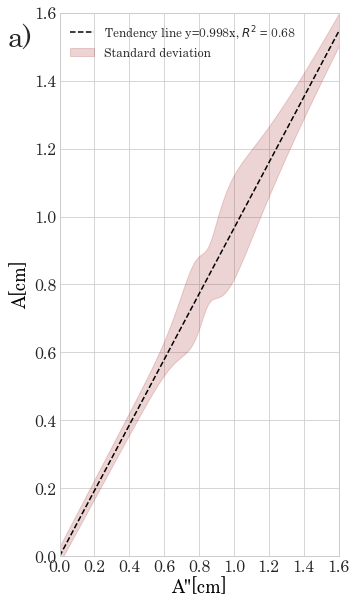

In [54]:
#plotting the the observed amplitude as a function of fitted amplitude, then alos the standard deviation useing shaded area
plt.figure(figsize=(5,10))

#plt.xlabel('fitted A [cm]',fontname='Century',fontsize=18, color='black')
#plt.ylabel('Observed A [cm]',fontname='Century', fontsize=18, color='black')

model = LinearRegression(fit_intercept=False)
model.fit(rt[0][:, np.newaxis], rt[1])   #all observed amplitudes
xfit = np.linspace(0, 2, 200)
yfit = model.predict(xfit[:, np.newaxis])
c = np.polyfit(xfit,yfit,1)

y = c[0]*x 
lineA = plt.plot(x, y, label='Tendency line y=0.998x, $ R^2$ = 0.64',color='black', linestyle='dashed')


#plt.fill_between(x, y - stdv[1], y + stdv[1], color='red', alpha=0.2)

x1 = np.linspace(0, 2, 200)
a_BSpline = make_interp_spline(stdv[0], stdv[1])
y1 = a_BSpline(x1)
#plt.plot(x, y,color='brown')
y = c[0]*x 
lineB = plt.fill_between(x1,  y - stdv[1], y + stdv[1], label='Standard deviation', color='brown', alpha=0.2)

#plt.plot(rt[0],rt[1],'.',color='red')
#plt.plot(f['A1'],f[1],'.', label='S1', color='red')
#plt.plot(f['A2'],f[3],'.', label='S2', color='green')
##plt.plot(f['A3'],f[5],'.', label='S3', color='blue')
#plt.plot(f['A4'],f[7],'.', label='S4', color='orange')
#plt.plot(f['A5'],f[9],'.', label='S5', color='pink')


plt.xlabel('A"[cm]',fontname='Century',fontsize=18, color='black')
plt.ylabel('A[cm]',fontname='Century', fontsize=18, color='black')
plt.legend(fontsize=12, frameon=False)

plt.xlim(0, 1.6)
plt.ylim(0, 1.6)
plt.xticks(fontsize=16)
plt.xticks(np.arange(0,1.61, step=0.2))
plt.yticks(fontsize=16)
plt.text(-0.3, 1.5, 'a)', fontsize=28)
print(c)

In [57]:
r = np.corrcoef(rt[0], rt[1])
r = r*r
r

array([[1.        , 0.63731399],
       [0.63731399, 1.        ]])

In [18]:
rt.to_csv (r'E:/framp.csv', index = False, header=True)

## ship sizes

In [23]:
#f = pd.DataFrame(name=[s1, s2, s3, s4, s5])''
f1 = pd.Series([9.8, 16.2, 22.6, 29, 35.4], index=['s1', 's2', 's3', 's4', 's5']) 
f1

s1     9.8
s2    16.2
s3    22.6
s4    29.0
s5    35.4
dtype: float64

In [24]:
f = pd.DataFrame(f1)
f

,0
s1,9.8
s2,16.2
s3,22.6
s4,29.0
s5,35.4


In [25]:
f['s']=2/(f[0])
f

,0,s
s1,9.8,0.204082
s2,16.2,0.123457
s3,22.6,0.088496
s4,29.0,0.068966
s5,35.4,0.056497


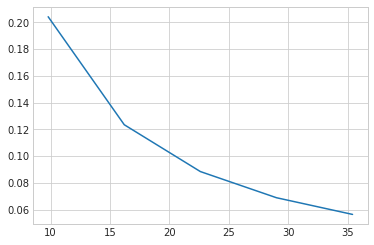

In [26]:
plt.plot(f[0], f['s'])

## *Brunt vaisala frequency* &  ship steepness & wavelength  <span style='color:red'> $N S(d, l) λ$ <span>

In [27]:
data = [[2.95, 3.04, 1.67, 1.05, 4.58, 3.45, 1.45, 3.14, 4.84, 1.47, 3.13], [7, 7, 7, 7, 7, 7, 3, 3, 3, 5, 5],
        [5, 5, 5, 5, 5, 5, 9, 9, 9, 7, 7],
       [2.9, 2.9, 2.9, 2.9, 2.9, 2.9, 2.25, 2.25, 2.25, 2.9, 2.9],
       [6.96, 8.1, 4.4, 2.75, 12.25, 7.95, 2.95, 6.25, 9.55, 3.4, 7.2]]
data

[[2.95, 3.04, 1.67, 1.05, 4.58, 3.45, 1.45, 3.14, 4.84, 1.47, 3.13],
 [7, 7, 7, 7, 7, 7, 3, 3, 3, 5, 5],
 [5, 5, 5, 5, 5, 5, 9, 9, 9, 7, 7],
 [2.9, 2.9, 2.9, 2.9, 2.9, 2.9, 2.25, 2.25, 2.25, 2.9, 2.9],
 [6.96, 8.1, 4.4, 2.75, 12.25, 7.95, 2.95, 6.25, 9.55, 3.4, 7.2]]

In [28]:
N = pd.DataFrame(data, index=['N', 'h1', 'h2', 'hr', 'c0'], columns=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]).T
N

,N,h1,h2,hr,c0
1,2.95,7.0,5.0,2.90,6.96
2,3.04,7.0,5.0,2.90,8.10
3,1.67,7.0,5.0,2.90,4.40
4,1.05,7.0,5.0,2.90,2.75
5,4.58,7.0,5.0,2.90,12.25
6,3.45,7.0,5.0,2.90,7.95
7,1.45,3.0,9.0,2.25,2.95
8,3.14,3.0,9.0,2.25,6.25
9,4.84,3.0,9.0,2.25,9.55
10,1.47,5.0,7.0,2.90,3.40


In [10]:
N['N/C0'] = N['N']/N['c0'] 

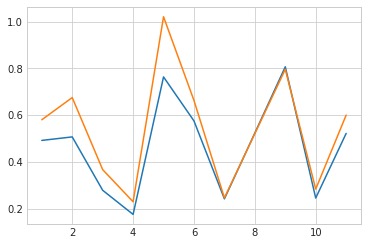

In [29]:
#plt.plot(N.index, N['N/C0']*2)
plt.plot(N.index, N['N']/6)
plt.plot(N.index, N['c0']/12)


In [30]:
data1 = [N['N'], N['c0']]
n = pd.DataFrame(data1).T
n

,N,c0
1,2.95,6.96
2,3.04,8.10
3,1.67,4.40
4,1.05,2.75
5,4.58,12.25
6,3.45,7.95
7,1.45,2.95
8,3.14,6.25
9,4.84,9.55
10,1.47,3.40


In [31]:
n = n.sort_values(by=['N'])
#n = n.reset_index(inplace=True)
n


,N,c0
4,1.05,2.75
7,1.45,2.95
10,1.47,3.40
3,1.67,4.40
1,2.95,6.96
2,3.04,8.10
11,3.13,7.20
8,3.14,6.25
6,3.45,7.95
5,4.58,12.25


In [32]:
n1 = n.reset_index(inplace=False)
n1.drop('index',
  axis='columns', inplace=True)

In [33]:
n1['s1'] = n1['N'] * f['s']['s1']
n1['s2'] = n1['N'] * f['s']['s2']
n1['s3'] = n1['N'] * f['s']['s3']
n1['s4'] = n1['N'] * f['s']['s4']
n1['s5'] = n1['N'] * f['s']['s5']
n1

,N,c0,s1,s2,s3,s4,s5
0,1.05,2.75,0.214286,0.129630,0.092920,0.072414,0.059322
1,1.45,2.95,0.295918,0.179012,0.128319,0.100000,0.081921
2,1.47,3.40,0.300000,0.181481,0.130088,0.101379,0.083051
3,1.67,4.40,0.340816,0.206173,0.147788,0.115172,0.094350
4,2.95,6.96,0.602041,0.364198,0.261062,0.203448,0.166667
5,3.04,8.10,0.620408,0.375309,0.269027,0.209655,0.171751
6,3.13,7.20,0.638776,0.386420,0.276991,0.215862,0.176836
7,3.14,6.25,0.640816,0.387654,0.277876,0.216552,0.177401
8,3.45,7.95,0.704082,0.425926,0.305310,0.237931,0.194915
9,4.58,12.25,0.934694,0.565432,0.405310,0.315862,0.258757


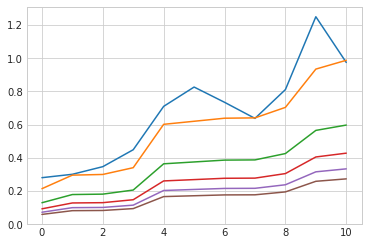

In [34]:
#plt.plot(n1.index, n1['N']) 
plt.plot(n1.index, n1['c0']/9.8) 
plt.plot(n1.index, n1['s1']) 
plt.plot(n1.index, n1['s2']) 
plt.plot(n1.index, n1['s3']) 
plt.plot(n1.index, n1['s4']) 
plt.plot(n1.index, n1['s5']) 

In [23]:
f['s']['s1']

0.2040816326530612

In [35]:
sl = [[3.0436241, 1.67088342, 1.04628578, 4.57669332, 3.45076877, 1.44572682, 3.14395212, 1.47358541],
       [36, 31.5, 27, 29.2, 25, 20, 16.2, 18.9],
       [34, 34, 29, 29, 29.5, 22.3, 21.8, 32.1],
       [32.5, 32, 27.4, 28.5, 31, 23.8, 26, 27],
       [34, 40, 32, 35.7, 34, 36.6, 25.8, 36.3],
       [36, 36.7, 42, 39, 38, 27.8, 19.2, 32.5]]


sl



[[3.0436241,
  1.67088342,
  1.04628578,
  4.57669332,
  3.45076877,
  1.44572682,
  3.14395212,
  1.47358541],
 [36, 31.5, 27, 29.2, 25, 20, 16.2, 18.9],
 [34, 34, 29, 29, 29.5, 22.3, 21.8, 32.1],
 [32.5, 32, 27.4, 28.5, 31, 23.8, 26, 27],
 [34, 40, 32, 35.7, 34, 36.6, 25.8, 36.3],
 [36, 36.7, 42, 39, 38, 27.8, 19.2, 32.5]]

In [36]:
sl = pd.DataFrame(sl, index=['N', 's1', 's2', 's3', 's4', 's5'])
sl 

,0,1,2,3,4,5,6,7
N,3.043624,1.670883,1.046286,4.576693,3.450769,1.445727,3.143952,1.473585
s1,36.000000,31.500000,27.000000,29.200000,25.000000,20.000000,16.200000,18.900000
s2,34.000000,34.000000,29.000000,29.000000,29.500000,22.300000,21.800000,32.100000
s3,32.500000,32.000000,27.400000,28.500000,31.000000,23.800000,26.000000,27.000000
s4,34.000000,40.000000,32.000000,35.700000,34.000000,36.600000,25.800000,36.300000
s5,36.000000,36.700000,42.000000,39.000000,38.000000,27.800000,19.200000,32.500000


In [37]:
N = N.T
N1 = pd.DataFrame(N)
N1

,1,2,3,4,5,6,7,8,9,10,11
N,2.95,3.04,1.67,1.05,4.58,3.45,1.45,3.14,4.84,1.47,3.13
h1,7.00,7.00,7.00,7.00,7.00,7.00,3.00,3.00,3.00,5.00,5.00
h2,5.00,5.00,5.00,5.00,5.00,5.00,9.00,9.00,9.00,7.00,7.00
hr,2.90,2.90,2.90,2.90,2.90,2.90,2.25,2.25,2.25,2.90,2.90
c0,6.96,8.10,4.40,2.75,12.25,7.95,2.95,6.25,9.55,3.40,7.20


In [38]:
b = N1.drop([1, 9, 11], axis='columns')
b


,2,3,4,5,6,7,8,10
N,3.04,1.67,1.05,4.58,3.45,1.45,3.14,1.47
h1,7.00,7.00,7.00,7.00,7.00,3.00,3.00,5.00
h2,5.00,5.00,5.00,5.00,5.00,9.00,9.00,7.00
hr,2.90,2.90,2.90,2.90,2.90,2.25,2.25,2.90
c0,8.10,4.40,2.75,12.25,7.95,2.95,6.25,3.40


In [39]:
N = np.array(b)
N = pd.DataFrame(N, index=['N', 'h1', 'h2', 'hr', 'c0'])
N

,0,1,2,3,4,5,6,7
N,3.04,1.67,1.05,4.58,3.45,1.45,3.14,1.47
h1,7.00,7.00,7.00,7.00,7.00,3.00,3.00,5.00
h2,5.00,5.00,5.00,5.00,5.00,9.00,9.00,7.00
hr,2.90,2.90,2.90,2.90,2.90,2.25,2.25,2.90
c0,8.10,4.40,2.75,12.25,7.95,2.95,6.25,3.40


In [40]:
S = np.concatenate((N, sl))
S = pd.DataFrame(S, index=['N', 'h1', 'h2', 'hr', 'c0', 'N1', 'lambda1', 'lambda2', 'lambda3', 'lambda4', 'lambda5'], 
                 columns=['exp2', 'exp3', 'exp4', 'exp5', 'exp6', 'exp7', 'exp8', 'exp10'])
S = S.drop(index=['N1'])
S = S.T
S

,N,h1,h2,hr,c0,lambda1,lambda2,lambda3,lambda4,lambda5
exp2,3.04,7.0,5.0,2.90,8.10,36.0,34.0,32.5,34.0,36.0
exp3,1.67,7.0,5.0,2.90,4.40,31.5,34.0,32.0,40.0,36.7
exp4,1.05,7.0,5.0,2.90,2.75,27.0,29.0,27.4,32.0,42.0
exp5,4.58,7.0,5.0,2.90,12.25,29.2,29.0,28.5,35.7,39.0
exp6,3.45,7.0,5.0,2.90,7.95,25.0,29.5,31.0,34.0,38.0
exp7,1.45,3.0,9.0,2.25,2.95,20.0,22.3,23.8,36.6,27.8
exp8,3.14,3.0,9.0,2.25,6.25,16.2,21.8,26.0,25.8,19.2
exp10,1.47,5.0,7.0,2.90,3.40,18.9,32.1,27.0,36.3,32.5


In [41]:
S['slope1'] = f1['s1']#S['N'] * f['s']['s1']
S['slope2'] = f1['s2']#S['N'] * f['s']['s2']
S['slope3'] = f1['s3']#S['N'] * f['s']['s3']
S['slope4'] = f1['s4']#S['N'] * f['s']['s4']
S['slope5'] = f1['s5']#S['N'] * f['s']['s5']
S

,N,h1,h2,hr,c0,lambda1,lambda2,lambda3,lambda4,lambda5,slope1,slope2,slope3,slope4,slope5
exp2,3.04,7.0,5.0,2.90,8.10,36.0,34.0,32.5,34.0,36.0,9.8,16.2,22.6,29.0,35.4
exp3,1.67,7.0,5.0,2.90,4.40,31.5,34.0,32.0,40.0,36.7,9.8,16.2,22.6,29.0,35.4
exp4,1.05,7.0,5.0,2.90,2.75,27.0,29.0,27.4,32.0,42.0,9.8,16.2,22.6,29.0,35.4
exp5,4.58,7.0,5.0,2.90,12.25,29.2,29.0,28.5,35.7,39.0,9.8,16.2,22.6,29.0,35.4
exp6,3.45,7.0,5.0,2.90,7.95,25.0,29.5,31.0,34.0,38.0,9.8,16.2,22.6,29.0,35.4
exp7,1.45,3.0,9.0,2.25,2.95,20.0,22.3,23.8,36.6,27.8,9.8,16.2,22.6,29.0,35.4
exp8,3.14,3.0,9.0,2.25,6.25,16.2,21.8,26.0,25.8,19.2,9.8,16.2,22.6,29.0,35.4
exp10,1.47,5.0,7.0,2.90,3.40,18.9,32.1,27.0,36.3,32.5,9.8,16.2,22.6,29.0,35.4


In [23]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')


In [42]:
def highlight_max(k):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = k == k.max()
    return ['background-color: yellow' if v else '' for v in is_max]

def highlight_min(e):
    is_min = e == e.min()
    return ['background-color: blue' if v else '' for v in is_min]

def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0 else 'blue'
    return 'color: %s' % color

S.style.apply(highlight_max, subset=['N', 'c0'])
#S.style.applymap(color_negative_red)


,N,h1,h2,hr,c0,lambda1,lambda2,lambda3,lambda4,lambda5,slope1,slope2,slope3,slope4,slope5
exp2,3.04,7,5,2.9,8.1,36,34,32.5,34,36,9.8,16.2,22.6,29,35.4
exp3,1.67,7,5,2.9,4.4,31.5,34,32,40,36.7,9.8,16.2,22.6,29,35.4
exp4,1.05,7,5,2.9,2.75,27,29,27.4,32,42,9.8,16.2,22.6,29,35.4
exp5,4.58,7,5,2.9,12.25,29.2,29,28.5,35.7,39,9.8,16.2,22.6,29,35.4
exp6,3.45,7,5,2.9,7.95,25,29.5,31,34,38,9.8,16.2,22.6,29,35.4
exp7,1.45,3,9,2.25,2.95,20,22.3,23.8,36.6,27.8,9.8,16.2,22.6,29,35.4
exp8,3.14,3,9,2.25,6.25,16.2,21.8,26,25.8,19.2,9.8,16.2,22.6,29,35.4
exp10,1.47,5,7,2.9,3.4,18.9,32.1,27,36.3,32.5,9.8,16.2,22.6,29,35.4


In [43]:
S1 = np.vstack((S['slope1'], S['slope2'], S['slope3'], S['slope4'], S['slope5']))
S1 =pd.DataFrame(S1, index = ['s1', 's2', 's3', 's4', 's5'])
S2 = np.vstack((S['lambda1'], S['lambda2'], S['lambda3'], S['lambda4'], S['lambda5']))
S2 =pd.DataFrame(S2, index = ['l1', 'l2', 'l3', 'l4', 'l5'])
#S1
S1

,0,1,2,3,4,5,6,7
s1,9.8,9.8,9.8,9.8,9.8,9.8,9.8,9.8
s2,16.2,16.2,16.2,16.2,16.2,16.2,16.2,16.2
s3,22.6,22.6,22.6,22.6,22.6,22.6,22.6,22.6
s4,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0
s5,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4


In [25]:
S2

,0,1,2,3,4,5,6,7
l1,36.0,31.5,27.0,29.2,25.0,20.0,16.2,18.9
l2,34.0,34.0,29.0,29.0,29.5,22.3,21.8,32.1
l3,32.5,32.0,27.4,28.5,31.0,23.8,26.0,27.0
l4,34.0,40.0,32.0,35.7,34.0,36.6,25.8,36.3
l5,36.0,36.7,42.0,39.0,38.0,27.8,19.2,32.5


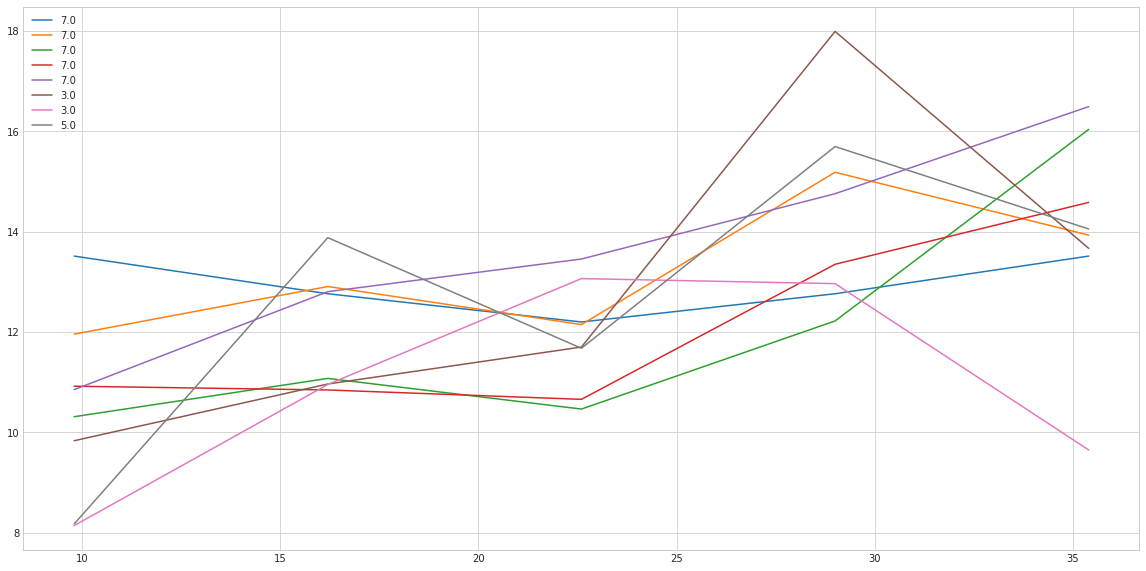

In [90]:
plt.figure(figsize = (20,10))
plt.plot(S1[0], S2[0]*(S['N']['exp2']/S['c0']['exp2']), label=S['h1']['exp2'])#shiplength vs U/N
plt.plot(S1[1], S2[1]*(S['N']['exp3']/S['c0']['exp3']), label=S['h1']['exp3'])
plt.plot(S1[2], S2[2]*(S['N']['exp4']/S['c0']['exp4']), label=S['h1']['exp4'])
plt.plot(S1[3], S2[3]*(S['N']['exp5']/S['c0']['exp5']), label=S['h1']['exp5'])
plt.plot(S1[4], S2[4]*(S['N']['exp6']/S['c0']['exp6']), label=S['h1']['exp6'])
plt.plot(S1[5], S2[5]*(S['N']['exp7']/S['c0']['exp7']), label=S['h1']['exp7'])
plt.plot(S1[6], S2[6]*(S['N']['exp8']/S['c0']['exp8']), label=S['h1']['exp8'])
plt.plot(S1[7], S2[7]*(S['N']['exp10']/S['c0']['exp10']), label=S['h1']['exp10'])
plt.legend()

## Check the equation       <span style='color:red'> $λ = 0.5d + f(ρ(z))$ <span>  ⇒  <span style='color:blue'>Find <span> $f(ρ(z))$

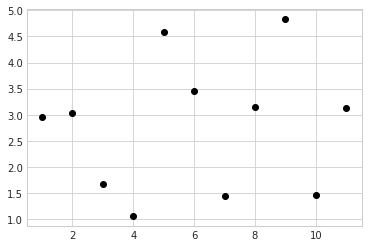

In [47]:
#plot N as a function of Index
plt.plot(n.index, n['N'],'o', color='black')
plt.plot(n.index, n['N'],'o', color='black')

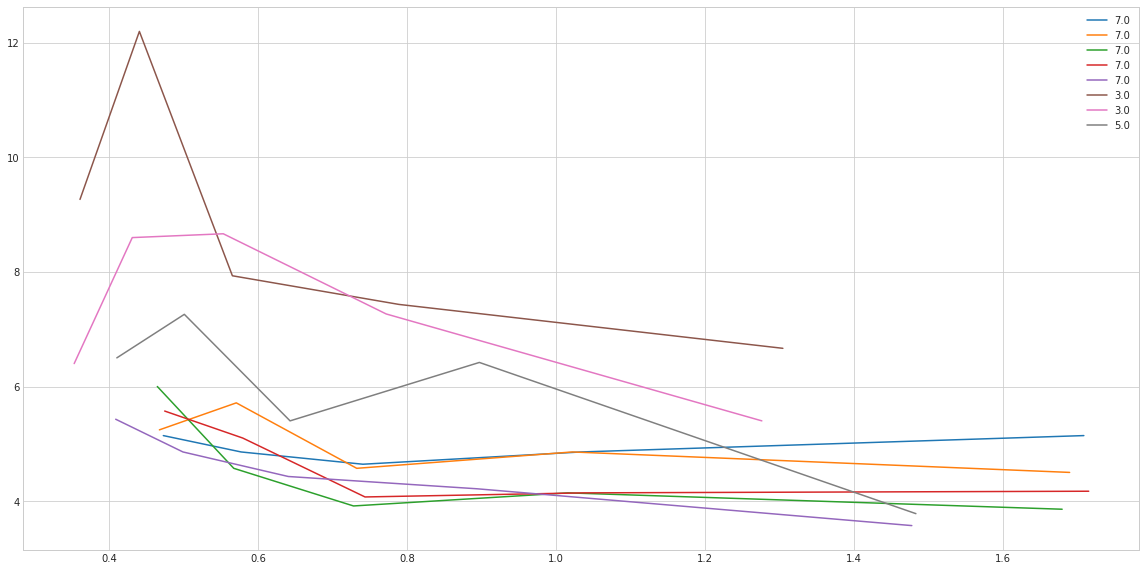

In [103]:
plt.figure(figsize = (20,10))
plt.plot(2*np.pi*S['c0']['exp2']/(S1[0]*S['N']['exp2']), S2[0]/S['h1']['exp2'], label=S['h1']['exp2'])#shiplength vs U/N
plt.plot(2*np.pi*S['c0']['exp3']/(S1[1]*S['N']['exp3']), S2[1]/S['h1']['exp3'], label=S['h1']['exp3'])
plt.plot(2*np.pi*S['c0']['exp4']/(S1[2]*S['N']['exp4']), S2[2]/S['h1']['exp4'], label=S['h1']['exp4'])
plt.plot(2*np.pi*S['c0']['exp5']/(S1[3]*S['N']['exp5']), S2[3]/S['h1']['exp5'], label=S['h1']['exp5'])
plt.plot(2*np.pi*S['c0']['exp6']/(S1[4]*S['N']['exp6']), S2[4]/S['h1']['exp6'], label=S['h1']['exp6'])
plt.plot(2*np.pi*S['c0']['exp7']/(S1[5]*S['N']['exp7']), S2[5]/S['h1']['exp7'], label=S['h1']['exp7'])
plt.plot(2*np.pi*S['c0']['exp8']/(S1[6]*S['N']['exp8']), S2[6]/S['h1']['exp8'], label=S['h1']['exp8'])
plt.plot(2*np.pi*S['c0']['exp10']/(S1[7]*S['N']['exp10']), S2[7]/S['h1']['exp10'], label=S['h1']['exp10'])

plt.legend()